### TUGAS 1 MACHINE LEARNING

#### Nama: Sabina Nurlatifah Aurelia

#### NIM: 2209106002

    Link Dataset
https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset/data

    Deskripsi tentang dataset

Dataset ini dirancang untuk memprediksi jenis tanaman paling cocok berdasarkan kondisi tanah dan iklim. Ini berguna dalam pertanian presisi, membantu petani dan pengambil kebijakan menentukan tanaman terbaik untuk ditanam 

Dataset mencakup 7 fitur agro-klimatik seperti kandungan nitrogen, fosfor, kalium, suhu, kelembapan, pH tanah, dan curah hujan, dengan label output berupa nama tanaman (contoh: padi, jagung, kapas, dll). Tujuannya adalah membangun model machine learning yang dapat memberikan rekomendasi tanaman optimal berdasarkan kondisi lingkungan.

Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Read Dataset

In [2]:
df = pd.read_csv("crop_recommendation.csv")

Data Cleaning

In [3]:
# Cek data hilang
print(df.isnull().sum())

# Hapus duplikat jika ada
df.drop_duplicates(inplace=True)

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [4]:
# Tangani outlier dengan IQR
def remove_outliers_iqr(dataframe, columns):
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        dataframe = dataframe[(dataframe[col] >= lower) & (dataframe[col] <= upper)]
    return dataframe
df = remove_outliers_iqr(df, ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])


Data Transformasi

In [5]:
#normalisasi
X = df.drop('label', axis=1)
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
#encoding label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

Feature Engineering

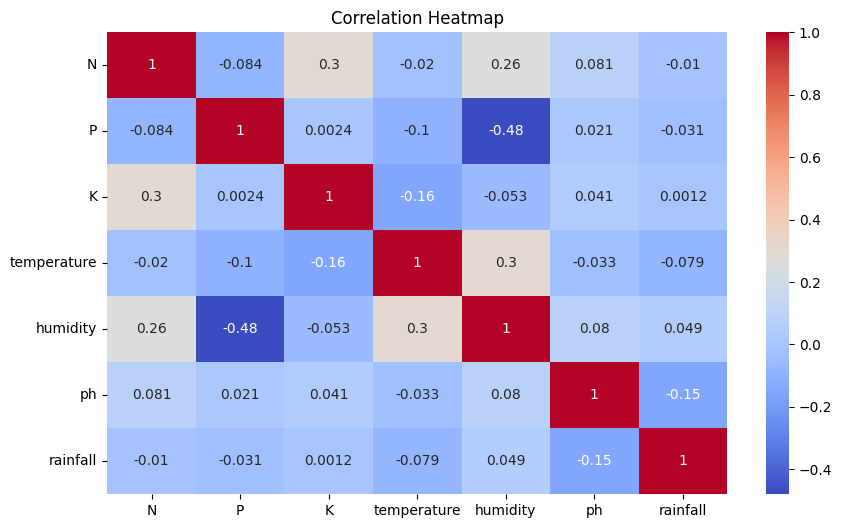

In [7]:
# Korelasi visual (optional)
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

PCA

In [8]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

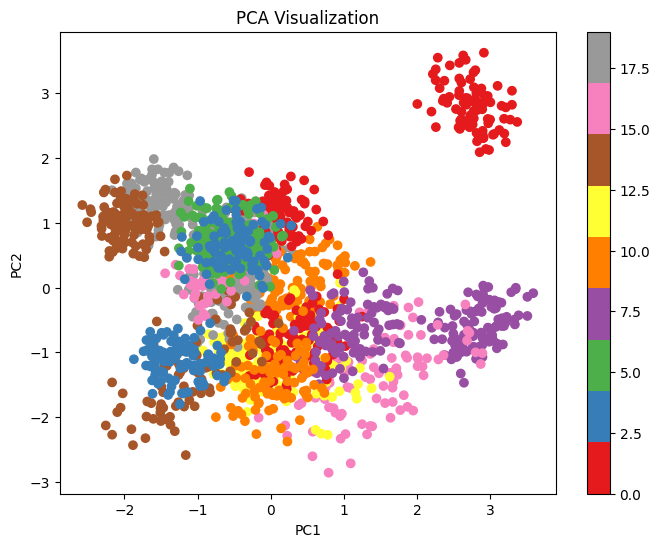

In [9]:
# Visualisasi PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_encoded, cmap='Set1')
plt.title("PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

    Mengapa melakukan preprocessing?

1. Membersihkan Data:
Menghapus data kosong, duplikat, dan outlier agar model tidak belajar dari data yang salah atau ekstrem.
(contohnya pH tanah 100!). Ini harus dibersihkan agar model tidak bingung atau belajar hal yang salah.

2. Menyeragamkan Skala:
Normalisasi atau standarisasi dibutuhkan agar semua fitur punya skala yang setara dan tidak mendominasi perhitungan model.
Misalnya, kandungan nitrogen hingga 100, tapi pH tanah hanya 4–9. Kalau tidak disamakan skalanya, model bisa terlalu fokus ke fitur tertentu

3. Meningkatkan Akurasi Model:
Data yang rapi dan konsisten membantu model belajar lebih baik dan menghasilkan prediksi yang lebih akurat.

4. Mengurangi Kompleksitas:
Seleksi fitur atau PCA membantu menghilangkan fitur yang tidak penting, sehingga model lebih efisien dan tidak overfitting.

5. Encoding Kategorikal:
Mengubah data teks menjadi angka agar bisa dipahami oleh algoritma machine learning.

Split Dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

Model: Random Forest

In [11]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Evaluasi Model

Accuracy Score: 0.9945945945945946

Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        18
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
        jute       1.00      0.90      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        12
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        16
      papaya       1.00      1.00      1.00        13
  pigeonpeas       1.

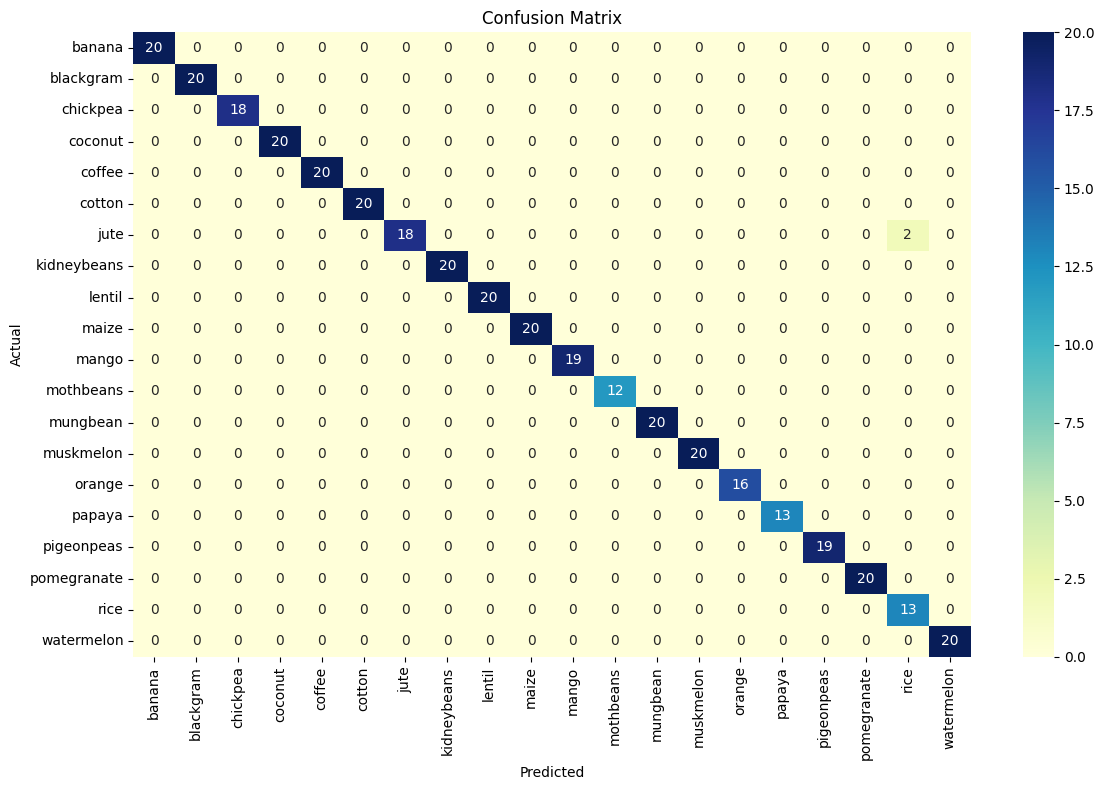

In [12]:
y_pred = rf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Menghitung akurasi pada data training dan testing

In [13]:
train_acc = accuracy_score(y_train, rf.predict(X_train))
test_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")


Train Accuracy: 1.0000
Test Accuracy : 0.9946


Menghitung akurasi cross validation

In [14]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_scaled, y_encoded, cv=5)
print("Cross-validation accuracy: %.4f ± %.4f" % (cv_scores.mean(), cv_scores.std()))


Cross-validation accuracy: 0.9930 ± 0.0028


Menguji model Random Forest pada data uji (X_test) dan menyimpan hasil prediksinya

In [21]:
import pandas as pd
from datetime import datetime

# Prediksi pada data test
y_pred = rf.predict(X_test)

# Konversi hasil prediksi ke label tanaman
predicted_labels = le.inverse_transform(y_pred)
true_labels = le.inverse_transform(y_test)

# Gabungkan dengan data input aslinya
test_results = pd.DataFrame(X_test, columns=X.columns)
test_results['Predicted_Crop'] = predicted_labels
test_results['Actual_Crop'] = true_labels
test_results['Timestamp'] = datetime.now()

# Tampilkan beberapa baris
print(test_results.head())


          N         P         K  temperature  humidity        ph  rainfall  \
0 -0.770345  0.837264 -0.767363     1.791056 -1.647773 -2.478398  0.067984   
1 -1.139560  1.459482 -0.646954    -0.436597 -2.076863 -0.812826  0.213421   
2 -0.875835 -1.607164  0.436727    -0.288809  0.921884 -0.789513  0.079105   
3 -0.823090 -1.784941  0.677545    -1.084242  1.081670  0.984619  0.116212   
4  0.363672  0.303934  0.978568    -0.309479  0.993981  0.123268 -0.727252   

  Predicted_Crop  Actual_Crop                  Timestamp  
0     pigeonpeas   pigeonpeas 2025-05-20 20:58:31.788392  
1    kidneybeans  kidneybeans 2025-05-20 20:58:31.788392  
2    pomegranate  pomegranate 2025-05-20 20:58:31.788392  
3    pomegranate  pomegranate 2025-05-20 20:58:31.788392  
4         papaya       papaya 2025-05-20 20:58:31.788392  


Model ini menggunakan algoritma Random Forest dan dilatih dengan data agro-klimatik: Kandungan Nitrogen (N), Fosfor (P), Kalium (K), Suhu udara, Kelembaban, pH tanah, Curah hujan
Dengan model ini, pengguna mendapatkan rekomendasi tanaman hanya dengan memasukkan data kondisi tanah dan iklim.